In [18]:
from LogRegCCD_script import LogRegCCD

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Predictions (first 10): [0.49986297 0.50031924 0.49999842 0.5001231  0.49989715 0.50027157
 0.4998114  0.49994878 0.49987126 0.49998351]
Best lambda: 0.23357214690901212, ROC-AUC: 0.8970


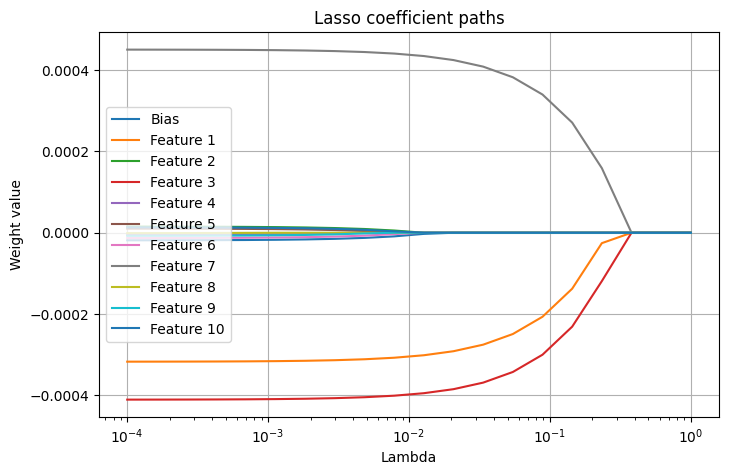

In [20]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_classes=2,
    random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Scale the data (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model (pure Lasso)
model = LogRegCCD(
    lambdas=np.logspace(-4, 0, 20), # <--- you can try another np.logspace(...)
    max_iter=1000,
    tol=1e-6
)

model.fit(X_train, y_train) # Fit model on training data

# Predict probabilities on test set using lambda=0.1
probs = model.predict_proba(X_test, lmbd=0.1)
print("Predictions (first 10):", probs[:10])

# Validate model and find best lambda on test set
best_lambda, best_score = model.validate(X_test, y_test, metric="roc_auc")
print(f"Best lambda: {best_lambda}, ROC-AUC: {best_score:.4f}")

# Plot how coefficients change with lambda
model.plot_weights()

📊 Validation results for different metrics:
                   Best Lambda  Best Score
precision             0.233572    0.871287
recall                0.379269    1.000000
f1                    0.233572    0.830189
balanced_accuracy     0.233572    0.823363
pr_auc                0.233572    0.933489
roc_auc               0.233572    0.896953


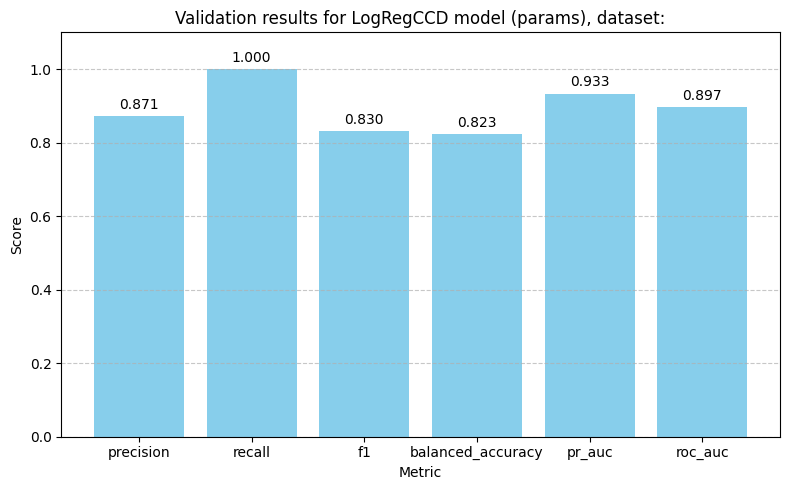

In [25]:
# Evaluate model using different metrics

# List of metrics to test
metrics = ["precision", "recall", "f1", "balanced_accuracy", "pr_auc", "roc_auc"]
validation_results = {}

# Loop through each metric and validate
for metric in metrics:
    best_lambda, best_score = model.validate(X_test, y_test, metric=metric)
    validation_results[metric] = {
        "Best Lambda": best_lambda,
        "Best Score": best_score
    }

# Convert results to DataFrame for better display
df_results = pd.DataFrame.from_dict(validation_results, orient="index")
print("📊 Validation results for different metrics:")
print(df_results)

# Prepare data
metric_names = list(validation_results.keys())
scores = [validation_results[m]["Best Score"] for m in metric_names]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(metric_names, scores, color='skyblue')
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Validation results for LogRegCCD model (params), dataset:")
plt.ylim(0, 1.1)  # Slightly above 1 for spacing
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show score values above each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()